<a href="https://colab.research.google.com/github/Jaser2005/Research-and-Projects/blob/master/DIabetes_predicton_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
'''
Hello everyone! This is Jaser Jalal
Stuednt at JB INSTITUTE OF ENGINEERING and TECHNOLOGY, India.

I'm very thrilled to share my "MINI PROJECT" November 2025 viz. DIABETES PREDICTION USING MACHINE LEARNING
'''
# NAME: MOHAMMED JASER JALAL
# DEPARTMENT : ARTIFICIAL INTELLIGENCE and MACHINE LEARNING
# YEAR/SEMESTER : 4th YEAR / 7th SEMESTER
# PROJECT TITLE: DIABETES PREDICTION USING MACHINE LEARNING
# GitHub Profile : https://github.com/Jaser2005/Research-and-Projects.git
# LinkedIn Profile: https://www.linkedin.com/in/jaser-jalal-a56b43256

#Import packages
import pandas as pd
import numpy as np
import sklearn #scikit-learn
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [121]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [122]:
#1 Load data
df = pd.read_csv('diabetes.csv')
print(df.shape)
print(df.head)

(768, 9)
<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.

Outcome
0    500
1    268
Name: count, dtype: int64


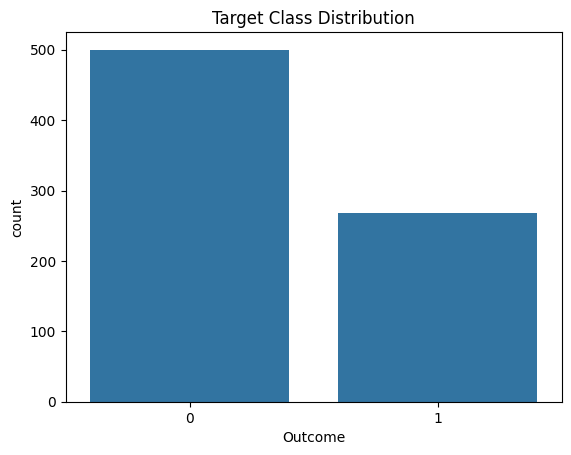

In [123]:
#2 Quick EDA (exploratory data analysis)
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome', data=df)
plt.title('Target Class Distribution')
plt.show()

In [124]:
#3 Replace zero values with NaN for columns where zero is impossible/invalid
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

In [125]:
# Show missing counts
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [126]:
# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [127]:
#5 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [128]:
#6 Preprocessing pipeline: impute -> scale
preprocess = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # median is robust to outliers
    ('scaler', StandardScaler())
])

X_train_prep = preprocess.fit_transform(X_train)
X_test_prep = preprocess.transform(X_test)

In [129]:
#7 Baseline model: Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_prep, y_train)
y_pred = lr.predict(X_test_prep)
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_prep)[:,1]))


Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

ROC AUC: 0.812962962962963


In [130]:
#8 Random forest (no scaling required but we already scaled --that's fine)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_prep, y_train)
y_pred_rf = rf.predict(X_test_prep)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_prep)[:,1]))




Random Forest
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

ROC AUC: 0.8180555555555555


In [131]:
#9 XGBoost (often strong)
xbg = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xbg.fit(X_train_prep, y_train)
y_pred_xgb = xbg.predict(X_test_prep)
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xbg.predict_proba(X_test_prep)[:,1]))

XGBoost
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154

ROC AUC: 0.8101851851851852


In [132]:
#10 Compare models quickly
models = [
    ('Logistic', lr),
    ('RandomForest', rf),
    ('XGBoost', xbg)
]
for name, model in models:
    if hasattr(model, "predict_proba"):
        auc = roc_auc_score(y_test, model.predict_proba(X_test_prep)[:,1])
    else:
        # for SVM without prob, use decision_function (if available)
        try:
            auc = roc_auc_score(y_test, model.decision_function(X_test_prep))
        except:
            auc = None
    acc = accuracy_score(y_test, model.predict(X_test_prep))
    if auc is not None:
      print(f"{name}: Accuracy={acc:.3f}, AUC={auc:.3f}")
    else:
      print(f"{name}: Accuracy={acc:.3f}, AUC=N/A")

Logistic: Accuracy=0.708, AUC=0.813
RandomForest: Accuracy=0.773, AUC=0.818
XGBoost: Accuracy=0.766, AUC=0.810


                    feature  importance
1                   Glucose    0.272616
5                       BMI    0.163688
6  DiabetesPedigreeFunction    0.124927
7                       Age    0.113057
4                   Insulin    0.089395
2             BloodPressure    0.084337
0               Pregnancies    0.080793
3             SkinThickness    0.071187


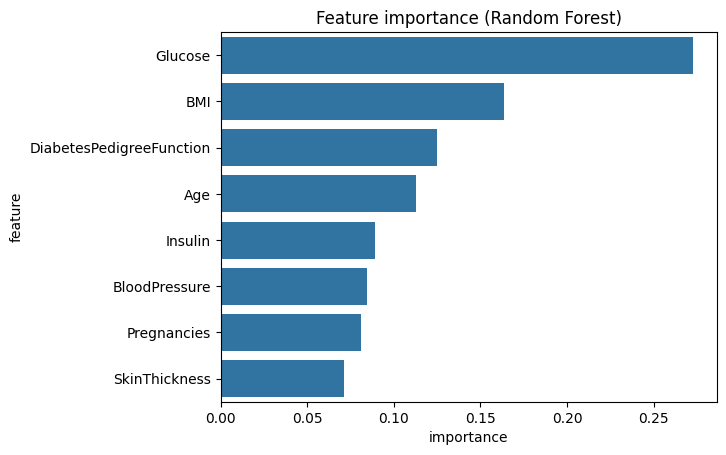

In [133]:
#11 Feature importance for RandomForest or XGBoost
feature_names = X.columns
importances = rf.feature_importances_
fi_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
print(fi_df)
sns.barplot(x='importance', y='feature', data=fi_df)
plt.title('Feature importance (Random Forest)')
plt.show()

In [134]:
#12 HyperParameter tuning example (for RandomForest)
param_grid = {
    'n_estimators':[100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
gs.fit(X_train_prep, y_train)
print("Best params:", gs.best_params_)
best_rf = gs.best_estimator_
print("Tuned RF AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test_prep)[:,1]))




Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Tuned RF AUC: 0.8144444444444444


In [138]:
#13 Save preprocessing and model
joblib.dump(preprocess, 'models/preprocess.joblib')
joblib.dump(best_rf, 'models/best_rf.joblib')

['models/best_rf.joblib']

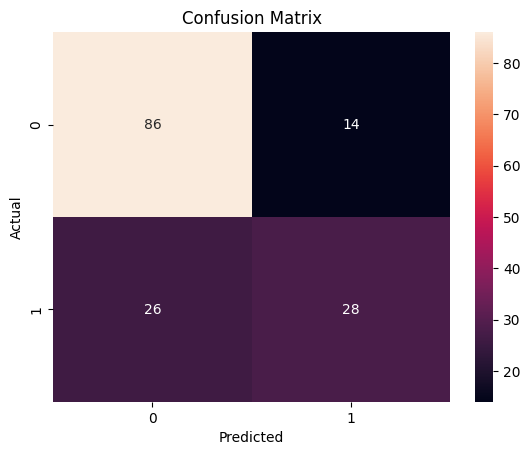

In [141]:
#14 Confusion matrix
y_pred_best = best_rf.predict(X_test_prep)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





